In [77]:
import os
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from CNNModel import CNNModel
from tensorflow.keras.models import Model

In [78]:
# Load CIFAR10 training and testing datasets from Karas
_, (x_test,y_test) = datasets.cifar10.load_data()

# Normalize Pixel values to be between 0 & 1
x_test = x_test/255

img = np.array(x_test[1020])
img_label = y_test[1020]
print(img_label)

images_list = []
images_list.append(np.array(img))
x = np.asarray(images_list)

[1]


In [79]:
m_id = 5 # Model id
model_dir = os.path.abspath('Models/') + f'/{m_id}/final_weights.hdf5'

In [80]:
# Load the saved model and weights
model = CNNModel(id=m_id)()
model.load_weights(model_dir)

In [82]:
# Extracts the outputs of the layers
layer_outputs = [layer.output for layer in model.layers] 
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [83]:
activations = activation_model.predict(x) # Returns a list of five Numpy arrays: one array per layer activation

In [87]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


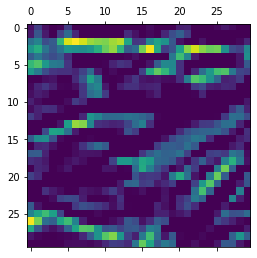

In [88]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')


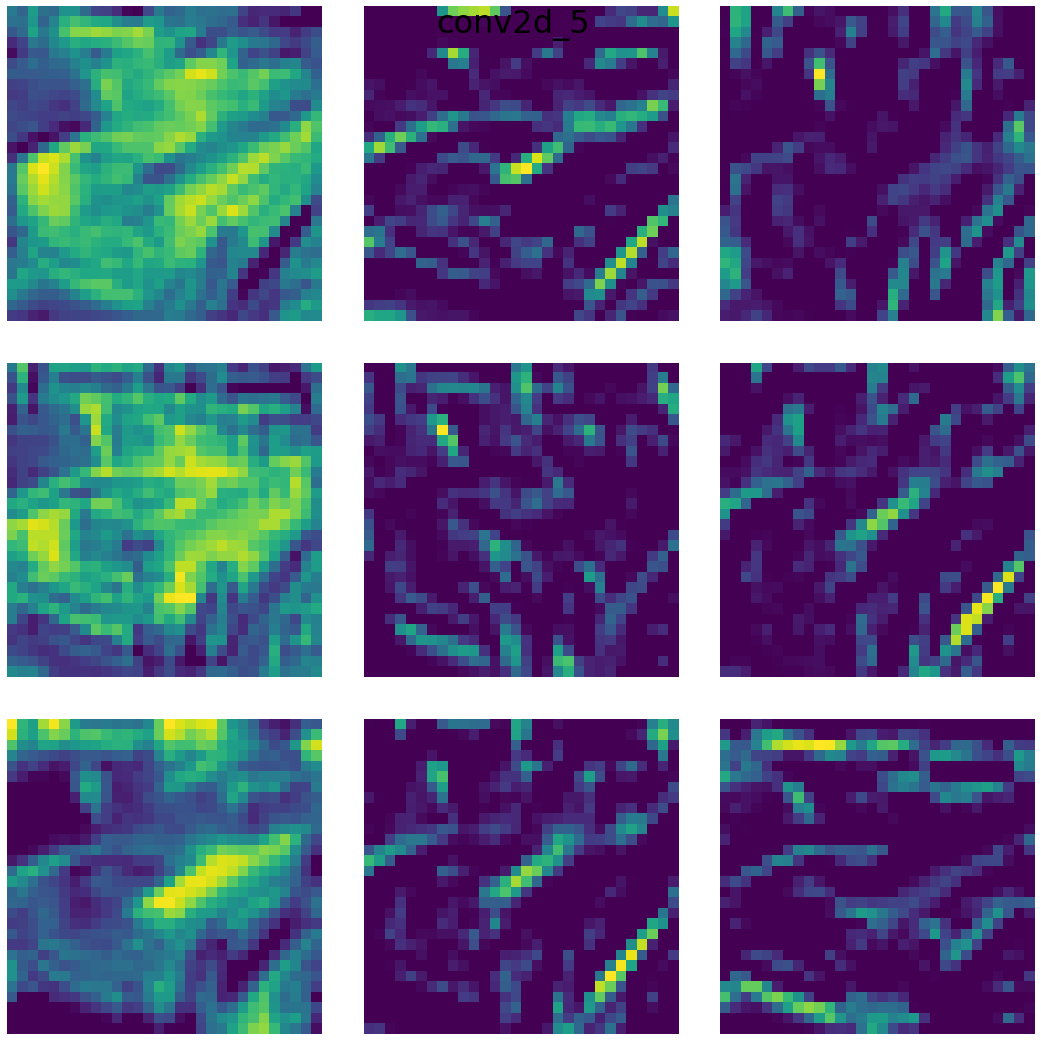

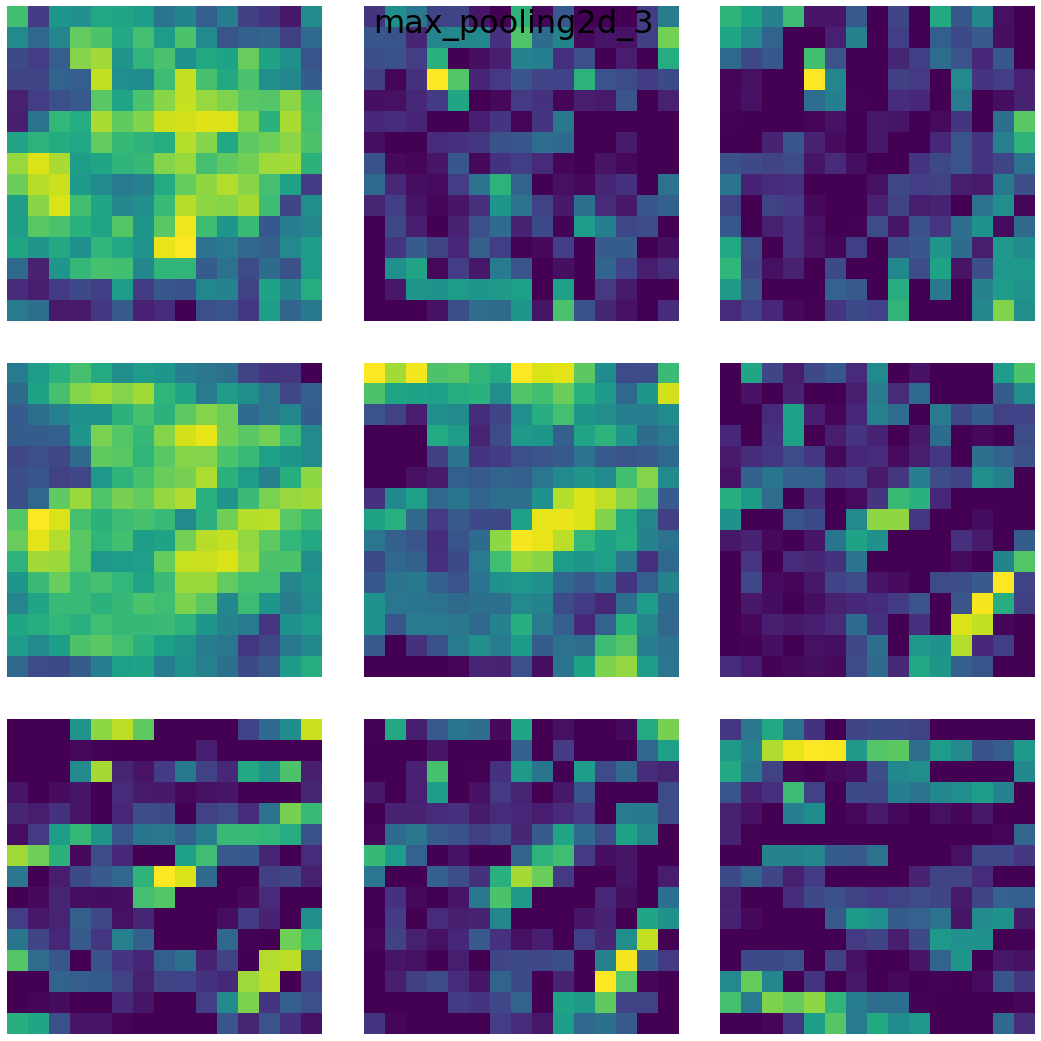

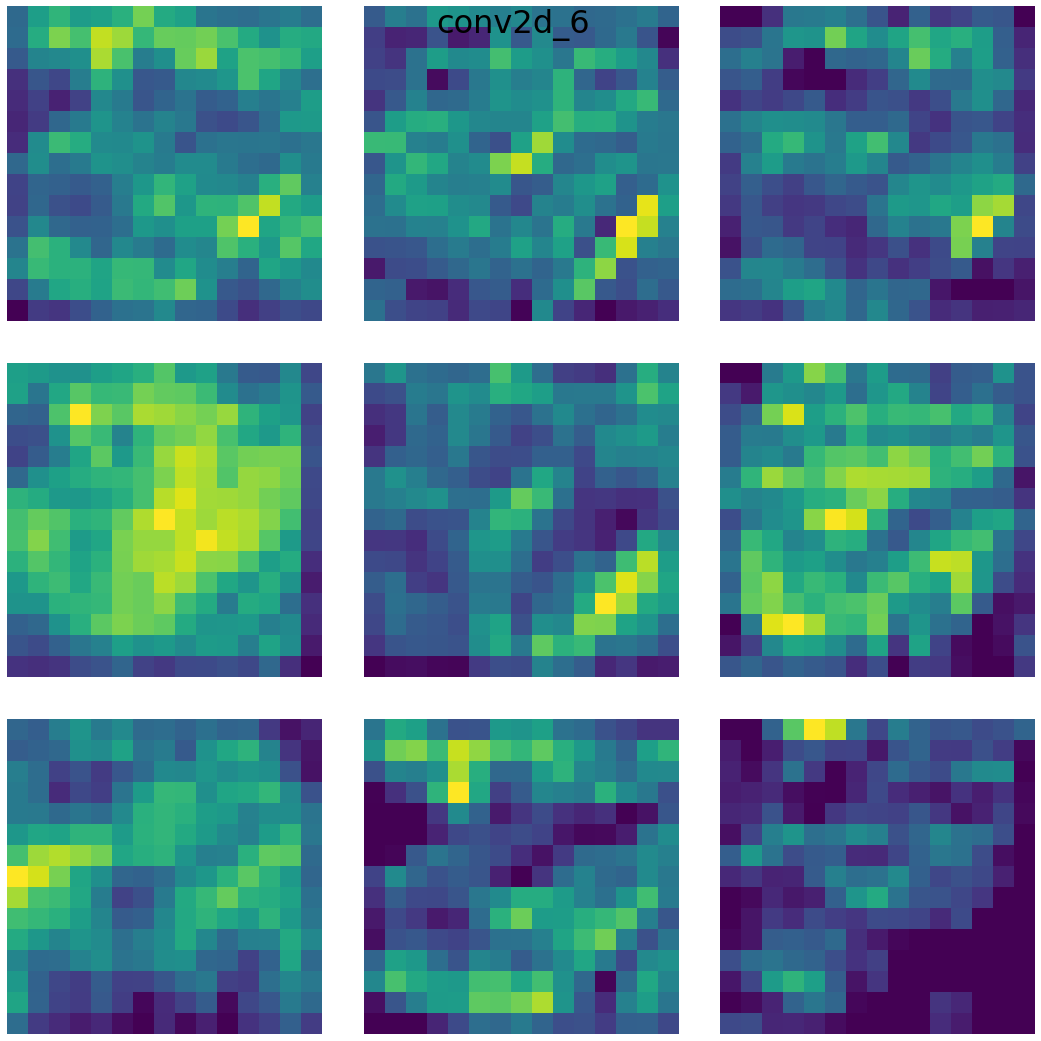

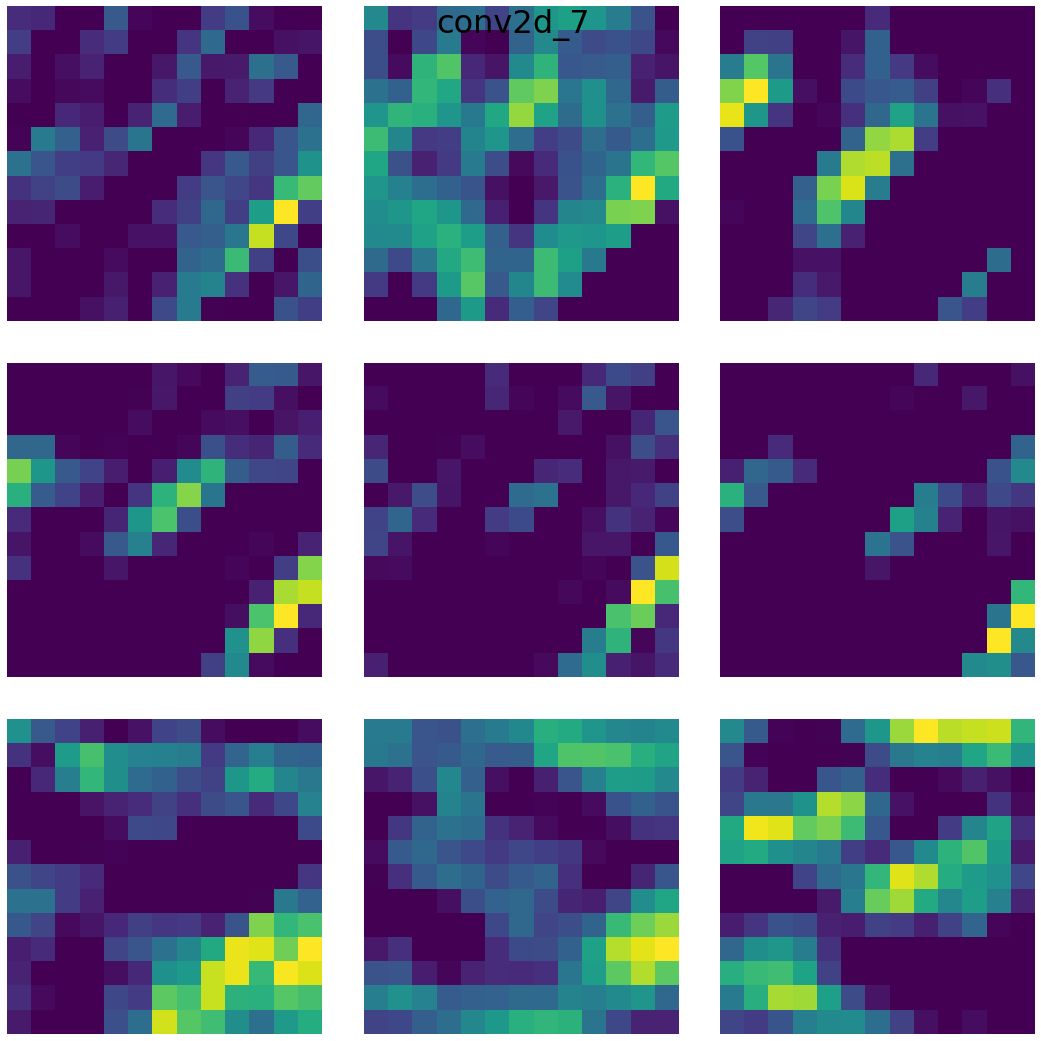

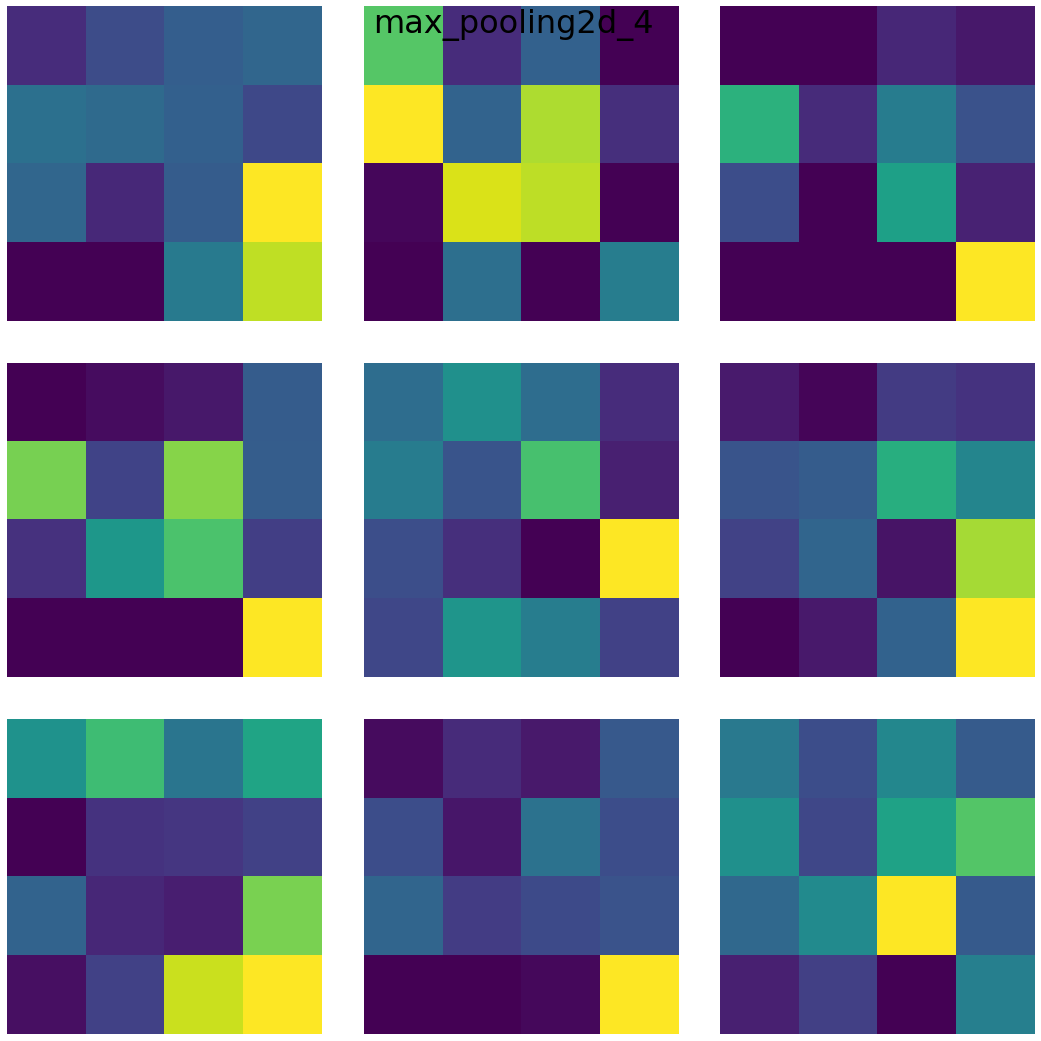

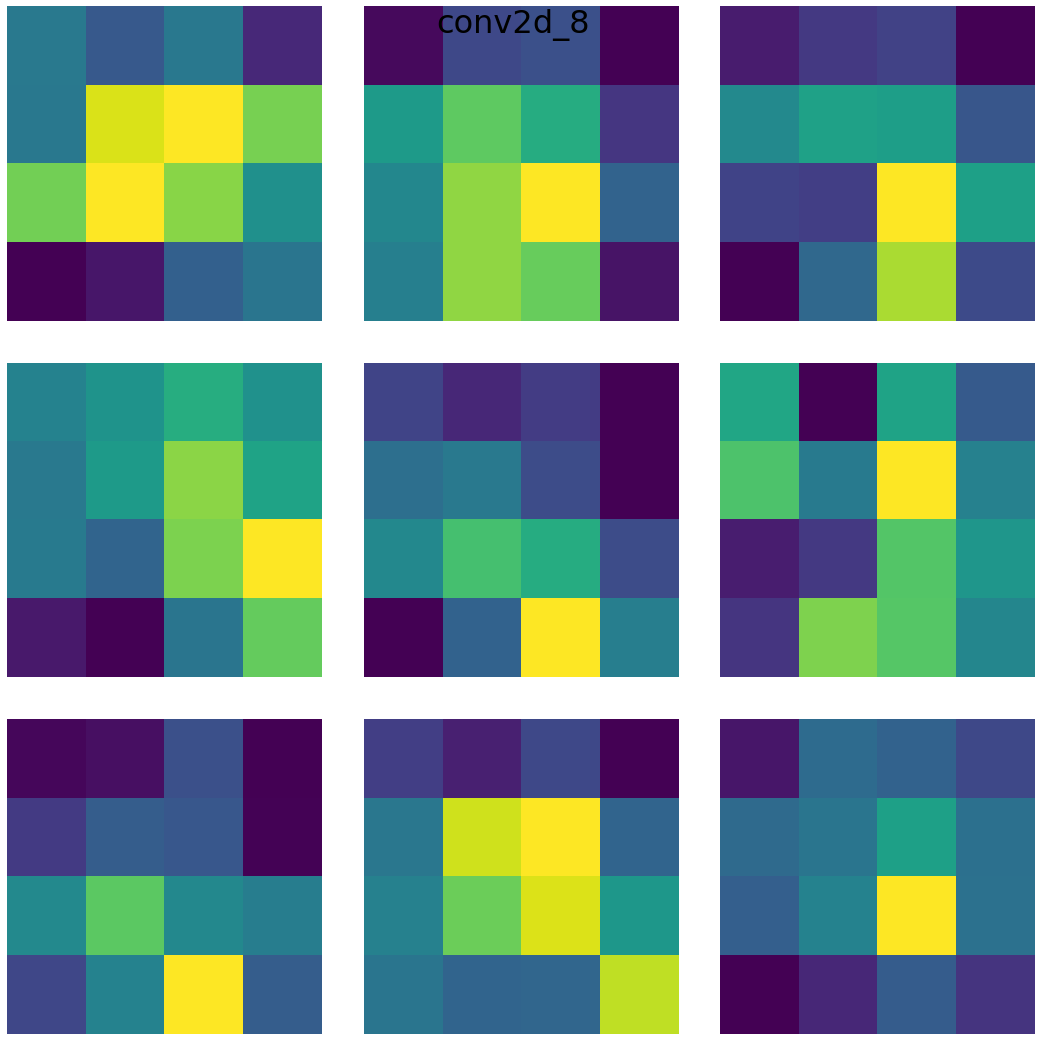

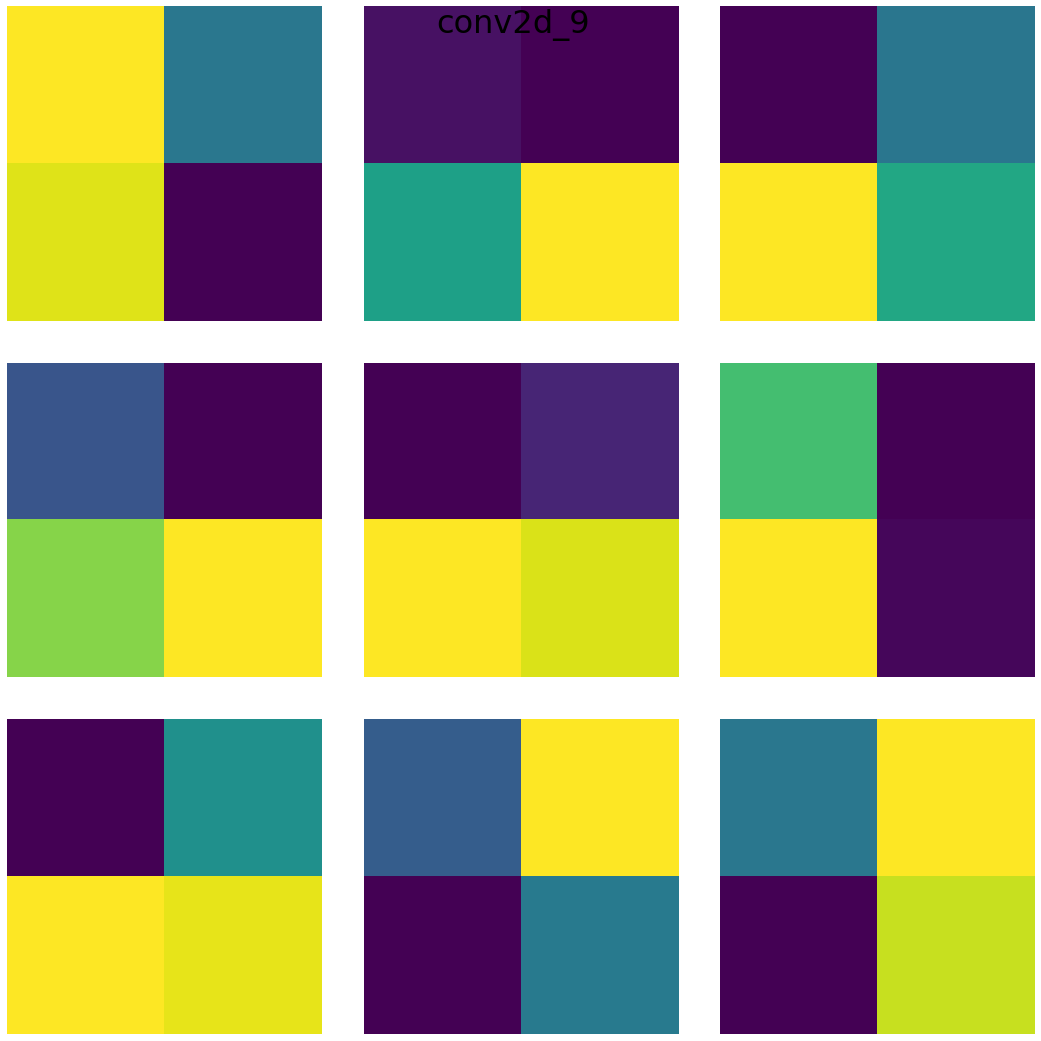

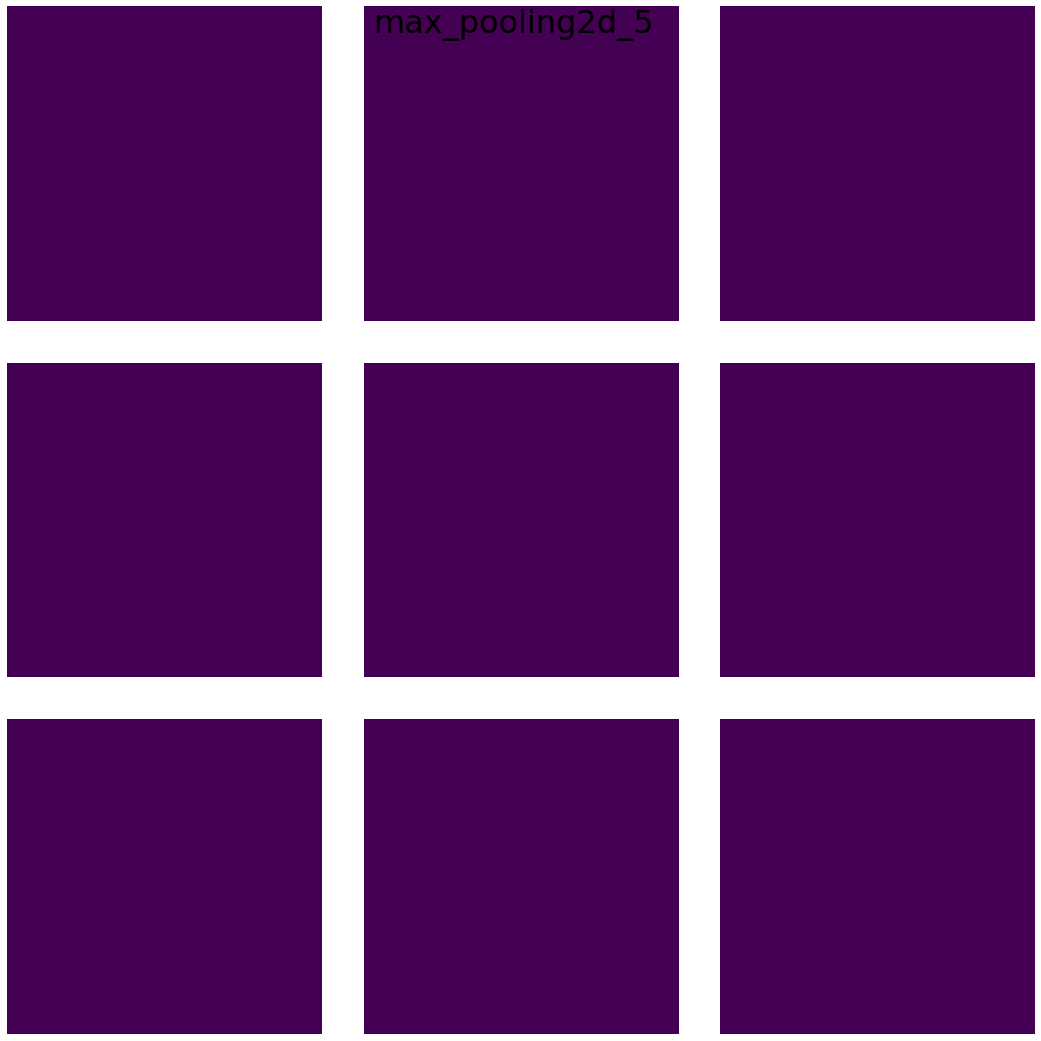

In [103]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 3
images_per_col = 3

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).


    n_cols = 3
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    most_active = []
    lowest = float('-inf')
    
    if len(layer_activation.shape) == 4 and layer_name != 'flatten':
        for i in range(n_features):
            channel_image = layer_activation[0,
                                                :, :,
                                                i]
            norm = np.linalg.norm(channel_image)

            if (len(most_active) == 9 and most_active[-1][-1] < norm) or len(most_active) != 9: 
                
                most_active.append((channel_image, norm))
                most_active.sort(key=lambda x: -x[1]) # Largest to smallest

                if len(most_active) > 9:
                    most_active.pop()

        fig, axes = plt.subplots(nrows=images_per_row, ncols=images_per_col, figsize=(15,15))
        fig.tight_layout()

        fig.suptitle(layer_name, fontsize=32)
        for col in range(images_per_col):
            for row in range(images_per_row):
                channel_image, _ = most_active[col * images_per_row + row] 
                axes[row, col].axis('off')
                axes[row, col].imshow(channel_image)
        


   
